<a href="https://colab.research.google.com/github/bd1ng/eda_rev/blob/main/eda_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Source Data



In [ ]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries for data manipulation, numerical operations, and plotting
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs

In [ ]:
amazon_data = pd.read_json('/content/drive/MyDrive/Datasets_TK530/Appliances_5.json', lines= True)
df = amazon_data
amazon_data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN


#2. Clean Data

In [ ]:
# Column work: Dropping unwanted columns, converting to date, & rearranging columns
df['new_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s', errors='coerce')
df['date'] = df['new_datetime'].dt.date
df = amazon_data.drop(columns=['reviewTime','unixReviewTime','image','new_datetime'])
df = df[['asin','style','date','overall','summary','reviewText','vote','reviewerName','verified']]
df.head()

,asin,style,date,overall,summary,reviewText,vote,reviewerName,verified
0,B00009W3I4,{'Style:': ' Dryer Vent'},2013-08-22,5,Great product,I like this as a vent as well as something tha...,NaN,James. Backus,True
1,B00009W3PA,{'Size:': ' 6-Foot'},2016-02-08,5,Five Stars,good item,NaN,kevin.,True
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,NaN,CDBrannom,True
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,NaN,Calvin E Reames,True
4,B00009W3PA,{'Size:': ' 6-Foot'},2015-03-21,5,Five Stars,Price and delivery was excellent.,NaN,albert j. kong,True


In [ ]:
# Data cleanup: Change NA upvotes to 0, remove commas from large numbers & change to float data type
# Stripped leading and trailing whitespace from reviewerName
df['vote'] = df['vote'].fillna(0)
df['reviewerName'] = df['reviewerName'].str.strip()
df['vote'] = df['vote'].replace('[\$,]', '', regex=True).astype(float)
df.head()

,asin,style,date,overall,summary,reviewText,vote,reviewerName,verified
0,B00009W3I4,{'Style:': ' Dryer Vent'},2013-08-22,5,Great product,I like this as a vent as well as something tha...,0.0,James. Backus,True
1,B00009W3PA,{'Size:': ' 6-Foot'},2016-02-08,5,Five Stars,good item,0.0,kevin.,True
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,0.0,CDBrannom,True
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,0.0,Calvin E Reames,True
4,B00009W3PA,{'Size:': ' 6-Foot'},2015-03-21,5,Five Stars,Price and delivery was excellent.,0.0,albert j. kong,True


In [ ]:
# Rename columns
df = df.rename(columns={
    'asin': 'Amazon Standard Identification Number',
    'style': 'Style',
    'date': 'Review Date',
    'overall': 'Overall Rating',
    'summary': 'Review Summary',
    'reviewText': 'Review Text',
    'reviewerName': 'Reviewer Name',
    'verified': 'Verified Purchase',
    'vote': 'Review Upvotes'
})
df.head()

,Amazon Standard Identification Number,Style,Review Date,Overall Rating,Review Summary,Review Text,Review Upvotes,Reviewer Name,Verified Purchase
0,B00009W3I4,{'Style:': ' Dryer Vent'},2013-08-22,5,Great product,I like this as a vent as well as something tha...,0.0,James. Backus,True
1,B00009W3PA,{'Size:': ' 6-Foot'},2016-02-08,5,Five Stars,good item,0.0,kevin.,True
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,0.0,CDBrannom,True
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,0.0,Calvin E Reames,True
4,B00009W3PA,{'Size:': ' 6-Foot'},2015-03-21,5,Five Stars,Price and delivery was excellent.,0.0,albert j. kong,True


In [ ]:
# Error, invalid, duplicate clean-up

df = df.dropna(subset=['Amazon Standard Identification Number','Overall Rating'])
df['Style'] = df['Style'].astype(str)
df = df.drop_duplicates()
df.head()

,Amazon Standard Identification Number,Style,Review Date,Overall Rating,Review Summary,Review Text,Review Upvotes,Reviewer Name,Verified Purchase
0,B00009W3I4,{'Style:': ' Dryer Vent'},2013-08-22,5,Great product,I like this as a vent as well as something tha...,0.0,James. Backus,True
1,B00009W3PA,{'Size:': ' 6-Foot'},2016-02-08,5,Five Stars,good item,0.0,kevin.,True
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,0.0,CDBrannom,True
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,0.0,Calvin E Reames,True
4,B00009W3PA,{'Size:': ' 6-Foot'},2015-03-21,5,Five Stars,Price and delivery was excellent.,0.0,albert j. kong,True


# 3(a). Describe the Data (Quantitative)

In [ ]:
numerical_columns = ['Overall Rating','Review Upvotes']

In [ ]:
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]  # `.mode()` can return multiple values, so we take the first mode
std_dev_values = df[numerical_columns].std()

In [ ]:
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)
print("\nStandard Deviation values:\n", std_dev_values)

Mean values:
 Overall Rating     4.533981
Review Upvotes    24.252427
dtype: float64

Median values:
 Overall Rating    5.0
Review Upvotes    0.0
dtype: float64

Mode values:
 Overall Rating    5.0
Review Upvotes    0.0
Name: 0, dtype: float64

Standard Deviation values:
 Overall Rating      1.062124
Review Upvotes    190.852527
dtype: float64


In [ ]:
mean_OR = df['Overall Rating'].mean()
median_OR = df['Overall Rating'].median()
#OR has no 0s
mode_OR = df['Overall Rating'].mode().iloc[0]
mean_RU = df['Review Upvotes'].mean()
median_RU = df['Review Upvotes'].median()
filtered_RU = df[df['Review Upvotes'] > 0]
mode_RU = filtered_RU['Review Upvotes'].mode().iloc[0]
mode_RU_inc = df['Review Upvotes'].mode().iloc[0]

##Overall Rating Analysis

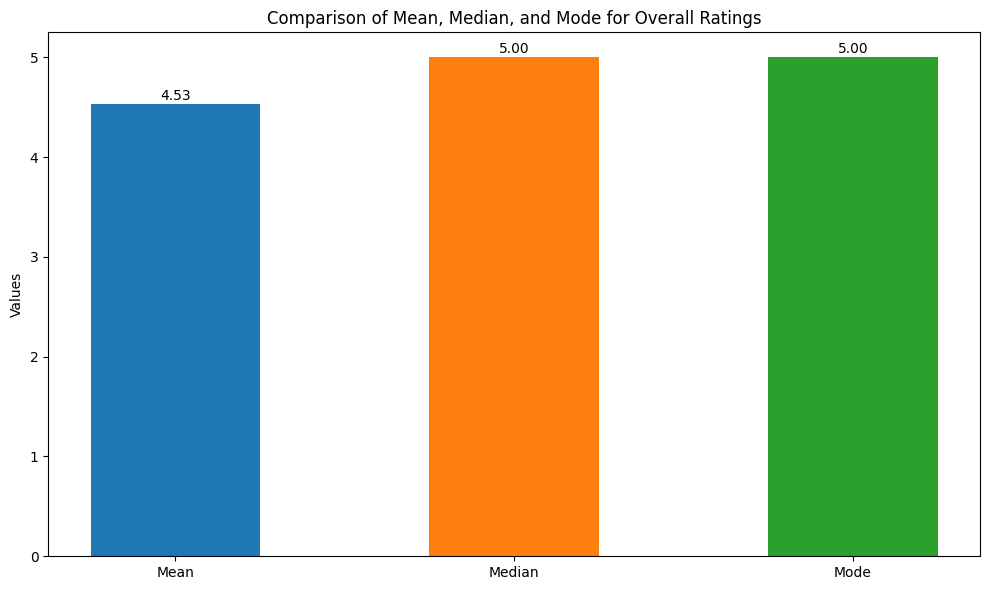

In [ ]:
# Overall Rating Mean, Median, Mode
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = [0, 0.2, 0.4]
bar_labels = ['Mean', 'Median', 'Mode']

ax.bar(bar_positions[0], mean_OR, width=0.1, label='Mean', align='center')
ax.bar(bar_positions[1], median_OR, width=0.1, label='Median', align='center')
ax.bar(bar_positions[2], mode_OR, width=0.1, label='Mode', align='center')

ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)
ax.set_ylabel("Values")
ax.set_title("Comparison of Mean, Median, and Mode for Overall Ratings")

for i, value in enumerate([mean_OR, median_OR, mode_OR]):
    ax.text(bar_positions[i], value + 0.01, f'{value:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['Overall Rating'].hist(figsize=(10,6), bins=bins)
plt.xticks(range(1, 6))
plt.suptitle('Histograms of Overall Ratings', fontsize=16)
plt.show()

NameError: name 'df' is not defined

<ipython-input-14-63d55c28628e>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_values[i], std_dev_values[i], col, fontsize=9)


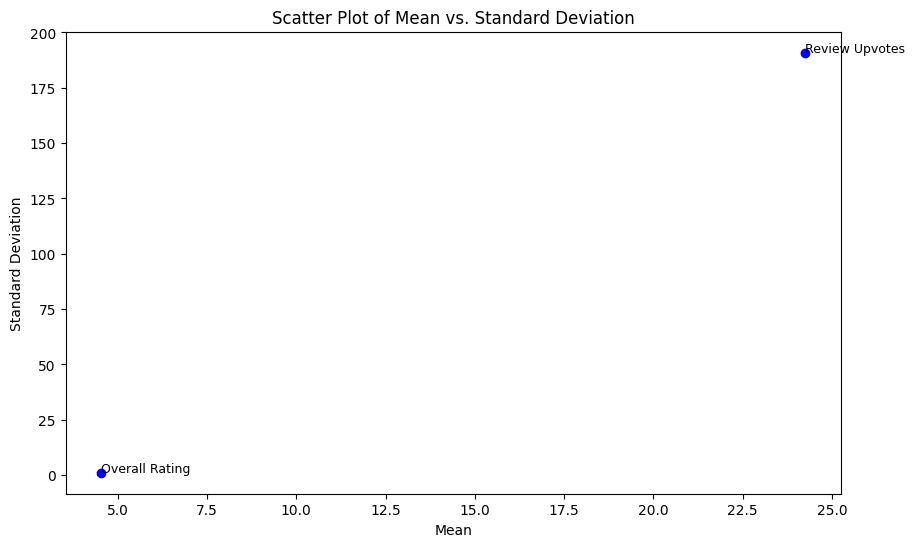

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values, std_dev_values, color='b')

for i, col in enumerate(numerical_columns):
    plt.text(mean_values[i], std_dev_values[i], col, fontsize=9)

plt.title('Scatter Plot of Mean vs. Standard Deviation')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.show()

###Critical Thinking

####**Describe the distribution. Is it normal? Bimodal? Left- or right-skewed? Why?**

This is a left (negative) skewed distribution. This is because the relatively lower data points drag the mean away from the median. This means that the data are not normally distributed.

####**What can you say about the data based on the distribution and the descriptive values you identified?**
The vast, vast majority of Amazon reviews for appliances are positive.  In fact, the vast majority of them are five-star reviews. Given the intense skew, the standard deviation is not very meaningful.



##Review Upvotes Analysis

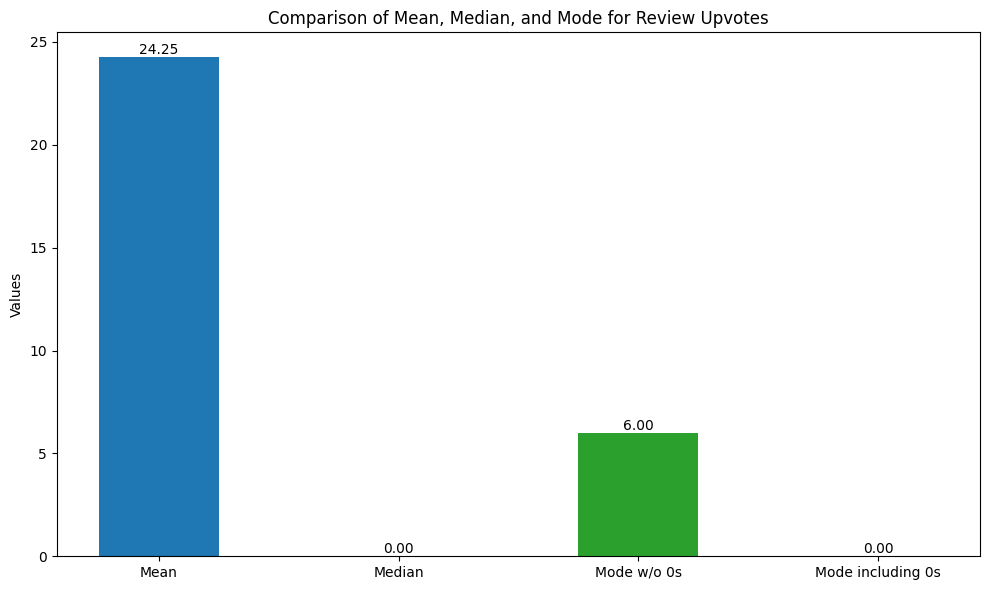

In [ ]:
# Review Upvotes Mean, Median, Mode
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = [0, 0.2, 0.4, 0.6]
bar_labels = ['Mean', 'Median', 'Mode w/o 0s', 'Mode including 0s']

ax.bar(bar_positions[0], mean_RU, width=0.1, label='Mean', align='center')
ax.bar(bar_positions[1], median_RU, width=0.1, label='Median', align='center')
ax.bar(bar_positions[2], mode_RU, width=0.1, label='Mode w/o 0s', align='center')
ax.bar(bar_positions[3], mode_RU_inc, width=0.1, label='Mode inc. 0s', align='center')

ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)
ax.set_ylabel("Values")
ax.set_title("Comparison of Mean, Median, and Mode for Review Upvotes")

for i, value in enumerate([mean_RU, median_RU, mode_RU, mode_RU_inc]):
    ax.text(bar_positions[i], value + 0.01, f'{value:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()

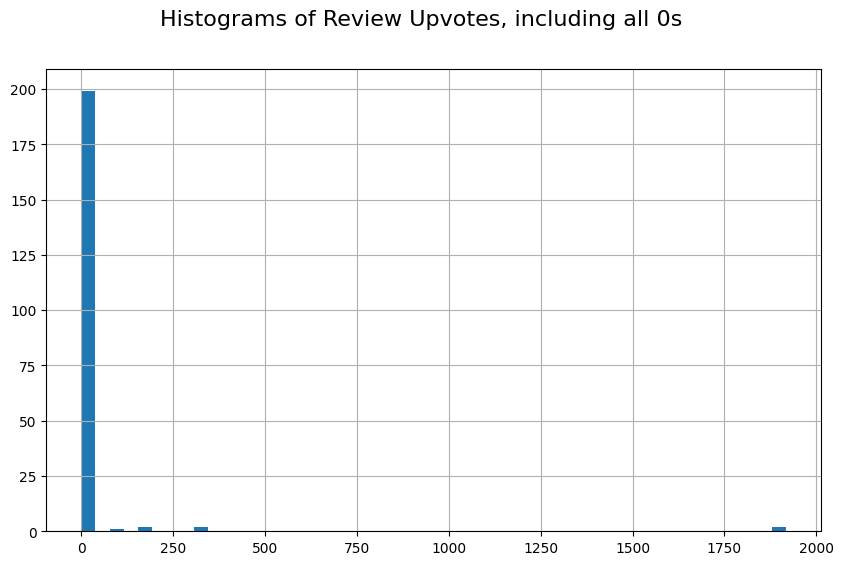

In [ ]:
df['Review Upvotes'].hist(figsize=(10,6), bins=50)
plt.suptitle('Histograms of Review Upvotes, including all 0s', fontsize=16)
plt.show()

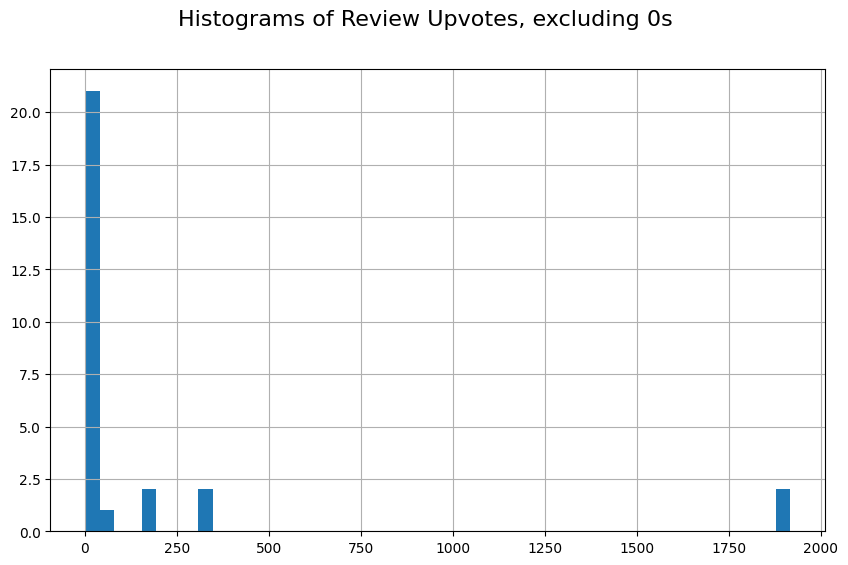

In [ ]:
filtered_RU['Review Upvotes'].hist(figsize=(10,6), bins=50)
plt.suptitle('Histograms of Review Upvotes, excluding 0s', fontsize=16)
plt.show()

<ipython-input-18-63d55c28628e>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_values[i], std_dev_values[i], col, fontsize=9)


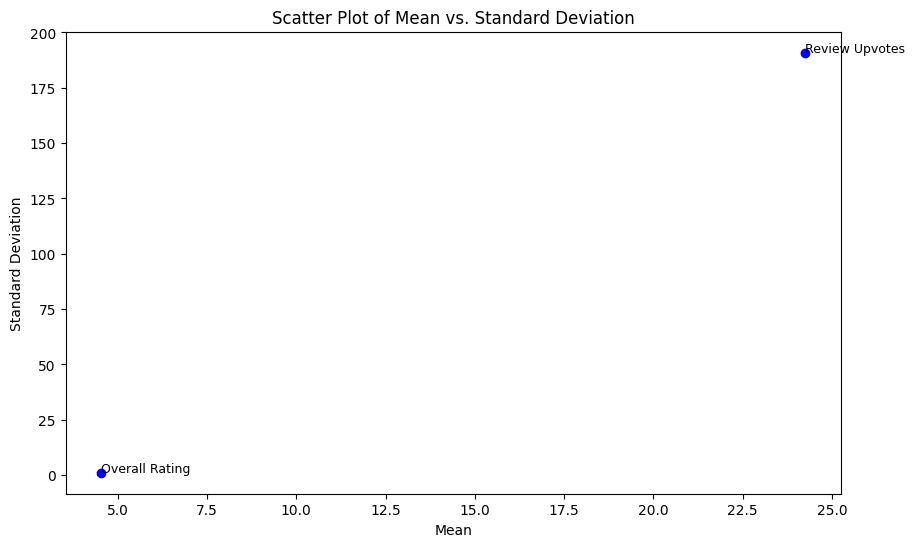

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values, std_dev_values, color='b')

for i, col in enumerate(numerical_columns):
    plt.text(mean_values[i], std_dev_values[i], col, fontsize=9)

plt.title('Scatter Plot of Mean vs. Standard Deviation')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.show()

##Critical Thinking

####**Describe the distribution. Is it normal? Bimodal? Left- or right-skewed? Why?**

This is a right (positive) skewed distribution. This is because the relatively higher data points drag the mean away from the median. This also means that the data are not normally distributed. Similar to above, given the intense skew, the standard deviation is not very meaningful.


####**What can you say about the data based on the distribution and the descriptive values you identified?**
Most reviews are not "upvoted" (or perhaps even viewed) by the vast majority of other users.  Some, on the other hand, receive an immense amount of "likes."



# 3.(b) Applying Qualitative Analysis

In [ ]:
import re
from collections import Counter

## Regular Expression (re)

In [ ]:
# Generate the most common words in reviews

def standard_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    return text.split()

all_words = df['Review Text'].apply(standard_text).sum()
word_counts = Counter(all_words)
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word','Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
word_freq_df.head(2000)

# From this, I identified the most common (and only...) appliance to be mentioned: dryers
# Dryers appear 78 times in the data (though it could appear multiple times per review)

,Word,Frequency
0,the,666
1,i,326
2,and,311
3,to,293
4,a,257
...,...,...
1434,previous,1
1435,experience,1
1436,peace,1
1437,mind,1


In [ ]:
# Create a subdata-set with dryer reviews

def dryer_reviews(text):
    dryer_match = re.search(r'(dryer)', text.lower())
    if dryer_match:
      return 'dryer'
    return 'not dryer'

# Making a separate df so I don't screw up the original...
df_dryer = df

# Filtering the reviews by dryer (if included in review text)
df_dryer['Dryer Review'] = df_dryer['Review Text'].apply(dryer_reviews)
df_dryer = df_dryer[~df_dryer['Dryer Review'].str.contains('not dryer', case = False, na=False)]
df_dryer['Count'] = range(1, len(df_dryer) +1)
df_dryer.head(1000)

# Although the word dryer appears 78 times in the data set, it is only in 33 reviews.


<ipython-input-37-e98df690df95>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dryer['Count'] = range(1, len(df_dryer) +1)


,Amazon Standard Identification Number,Style,Review Date,Overall Rating,Review Summary,Review Text,Review Upvotes,Reviewer Name,Verified Purchase,Dryer Review,Count
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,0.0,CDBrannom,True,dryer,1
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,0.0,Calvin E Reames,True,dryer,2
5,B00009W3PA,{'Size:': ' 6-Foot'},2013-12-26,5,Easy install,I purchasaed a new dryer and did not want to r...,0.0,Adam Baer,True,dryer,3
15,B000NCTOUM,nan,2015-11-11,5,Works on a Maytag also,Did the job for fixing our Maytag dryer,0.0,Calvin E Reames,True,dryer,4
20,B000NCTOUM,nan,2014-08-30,4,A spare thermofuse. Two years ago my dryer spu...,A spare thermofuse. Two years ago my dryer sp...,0.0,James. Backus,True,dryer,5
37,B0014CN8Y8,nan,2017-02-25,5,A great device that has my dryer working well ...,I bought this last October and finally got aro...,309.0,Goldengate,True,dryer,6
38,B0014CN8Y8,nan,2016-12-21,5,5 stars isn't enough to rate this product! It'...,This review is for Gardus RLE202 LintEater 10-...,15.0,MarkS,True,dryer,7
39,B0014CN8Y8,nan,2016-12-06,3,good kit with some caveats,first thing first: it works. the kit is great ...,6.0,CP,True,dryer,8
40,B0014CN8Y8,nan,2016-12-06,5,Worked like a charm,Works great. I used it and an extension kit wi...,6.0,Caleb,True,dryer,9
41,B0014CN8Y8,nan,2016-11-09,5,Excellent choice for cleaning out dryer vent l...,The lint eater is amazing! We recently bought ...,9.0,J. Foust,True,dryer,10


## Sentiment Analysis

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['Sentiment Score'] = df['Review Text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
def assign_vader_sentiment(compound):
    if compound >= 0.05:
      return 'Positive'
    if compound <= -0.05:
      return 'Negative'
    else:
      return 'Neutral'
df['Sentiment Label'] = df['Sentiment Score'].apply(assign_vader_sentiment)
df[['Review Summary','Review Text','Overall Rating', 'Sentiment Score', 'Sentiment Label']]

,Review Summary,Review Text,Overall Rating,Sentiment Score,Sentiment Label
0,Great product,I like this as a vent as well as something tha...,5,0.8720,Positive
1,Five Stars,good item,5,0.4404,Positive
2,Five Stars,Fit my new LG dryer perfectly.,5,0.7717,Positive
3,Perfect size,Good value for electric dryers,5,0.6486,Positive
4,Five Stars,Price and delivery was excellent.,5,0.5719,Positive
...,...,...,...,...,...
2262,Could not beat the great price and fast delivery!,Work perfectly and on time!,5,0.6696,Positive
2263,Five Stars,I use these regular on my jobs I love the pric...,5,0.6369,Positive
2274,Five Stars,good,5,0.4404,Positive
2275,Five Stars,washer washing,5,0.0000,Neutral


In [ ]:
# Out of curiosity, wanted to see how the sentiment analysis performed for the lower ratings...

df_descending = df.sort_values(by='Overall Rating', ascending=True)
df_descending[['Review Summary','Review Text','Overall Rating', 'Sentiment Score', 'Sentiment Label']].head(100)

# Seems that the sentiment analysis isn't doing too well here.

,Review Summary,Review Text,Overall Rating,Sentiment Score,Sentiment Label
2223,does not work as promised,piece of garbage switch set to high that it wi...,1,-0.5423,Negative
27,garbage,"see original remarks, made the mistake of buyi...",1,0.2462,Positive
2191,One Star,it did not last more then 3 days,1,0.0000,Neutral
9,NewAir will not stand behind their products - ...,"Be careful, NewAir will not stand by their pro...",1,0.9935,Positive
10,"WHAT A PIECE OF JUNK, NewAir doesn't stand by ...",We would give less than 1 star if possible DON...,1,0.1210,Positive
...,...,...,...,...,...
2244,Just like the more expensive filter,Filter functions and tastes exactly like the m...,5,0.3612,Positive
2219,Five Stars,Excellent! Exactly what I needed.,5,0.6114,Positive
2243,Just like the more expensive filters,Just as good as the more expensive filters I u...,5,0.1779,Positive
2241,water tastes great,First time I used this brand. But will buy it ...,5,0.5023,Positive


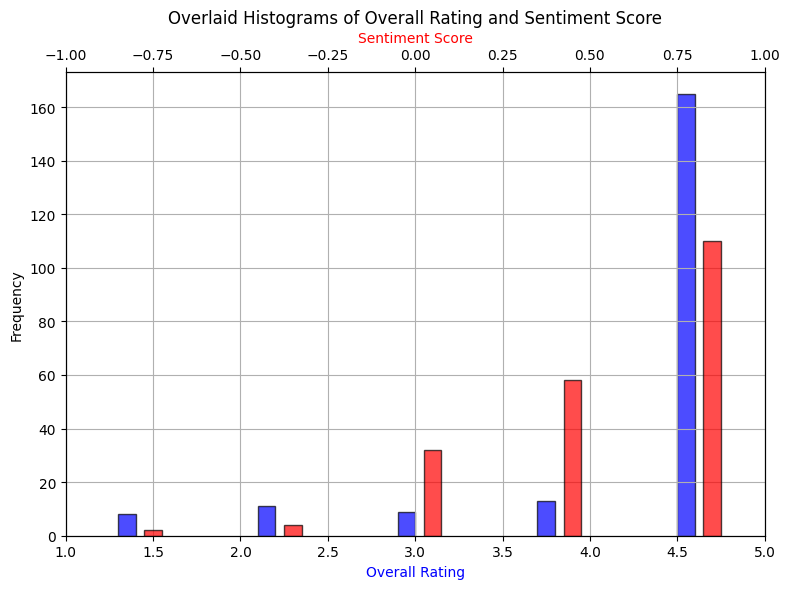

In [ ]:
# Doing a quick histogram of sentiment scores & ratings to see overlap

import matplotlib.pyplot as plt
import numpy as np

y1 = df['Overall Rating']
y2 = df['Sentiment Score']

bins_y1 = np.linspace(1, 5, 6)
bins_y2 = np.linspace(-1, 1, 6)

hist_y1, bin_edges_y1 = np.histogram(y1, bins=bins_y1)
hist_y2, bin_edges_y2 = np.histogram(y2, bins=bins_y2)

fig, ax1 = plt.subplots(figsize=(8, 6))

bar_width = 0.1

bin_centers_y1 = (bin_edges_y1[:-1] + bin_edges_y1[1:]) / 2
bin_centers_y2 = (bin_edges_y2[:-1] + bin_edges_y2[1:]) / 2

ax1.bar(bin_centers_y1 - bar_width / 2, hist_y1, width=bar_width, alpha=0.7, color='blue', edgecolor='black', label='y1')
ax1.set_xlabel('Overall Rating',color='blue')
ax1.set_ylabel('Frequency')
ax1.set_xlim(1, 5)

ax2 = ax1.twiny()
ax2.bar(bin_centers_y2 + bar_width / 2, hist_y2, width=bar_width/2, alpha=0.7, color='red', edgecolor='black', label='y2')
ax2.set_xlabel('Sentiment Score',color='red')
ax2.set_xlim(-1, 1)

plt.title('Overlaid Histograms of Overall Rating and Sentiment Score')
ax1.grid(True)
plt.tight_layout()
plt.show()

# 4. Topic Modelling & Qualitative Analysis

##Topic Modeling

1. Gensim:

- Gensim is a Python library specifically designed for unsupervised topic modeling and natural language processing.
- It provides efficient implementations of algorithms like Latent Dirichlet Allocation (LDA), which is widely used for discovering hidden topics in large text corpora.
- Gensim also includes tools for text preprocessing, such as tokenization and removing stopwords.

2. NLTK (Natural Language Toolkit):

- NLTK is a powerful library for working with human language data.
- It helps in text preprocessing tasks, such as tokenization, lemmatization, stemming, and stopword removal.
- NLTK is essential for cleaning and preparing text data before applying topic modeling.

3. pyLDAvis:

- pyLDAvis is a Python library used for interactive visualization of topic models.
- After building an LDA model, pyLDAvis allows us to visualize the distribution of topics and the importance of words within each topic.
- It provides an inter-topic distance map and helps in interpreting and refining the topic model results.




In [ ]:
pip install gensim nltk pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

NameError: name 'nltk' is not defined

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)

    tokens = simple_preprocess(text, deacc=True)
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

In [ ]:
df['processed_text'] = df['Review Text'].apply(preprocess_text)

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

In [ ]:
import gensim
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

NameError: name 'corpus' is not defined

In [ ]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.185902  0.002844       1        1  32.014344
1      0.018182 -0.131384       2        1  20.924997
2      0.096989 -0.039474       3        1  20.744402
4      0.057219  0.102408       4        1  19.622177
3      0.013512  0.065606       5        1   6.694080, topic_info=         Term       Freq      Total Category  logprob  loglift
1       great  60.000000  60.000000  Default  30.0000  30.0000
9        vent  64.000000  64.000000  Default  29.0000  29.0000
174    newair  28.000000  28.000000  Default  28.0000  28.0000
13       good  28.000000  28.000000  Default  27.0000  27.0000
45   warranty  27.000000  27.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
1       great   3.468226  60.012422   Topic5  -4.6799  -0.1470
407    better   1.971243   8.329642   Topic5  -5.2449   1.2628
80   actually   1.976255  11.926402   Topic5  -5.2423   0.9064
68        one   2.603177  47.515349   Topic5  -4.9668  -0.2004
411      easy   1.979868  12.507368   Topic5  -5.2405   0.8607

[327 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1130      2  0.823186  accompanies
80        1  0.419238     actually
80        2  0.251543     actually
80        3  0.167695     actually
80        5  0.167695     actually
...     ...       ...          ...
307       2  0.421689        years
307       4  0.421689        years
307       5  0.084338        years
589       1  0.267718        youve
589       2  0.669294        youve

[497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

##Word Clustering

Word Clustering Explanation: https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04

Word Clustering How-to: https://medium.com/@mehdirt/mastering-text-clustering-with-python-a-comprehensive-guide-f8617f53c327

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

nltk.download

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['Review Text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

labels_kmeans = kmeans.labels_
df['cluster_kmeans'] = labels_kmeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
!pip install scikit-learn-extra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00


In [ ]:
# K-Medoids Clustering

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=num_clusters, random_state=42, metric='cosine')
kmedoids.fit(X_tfidf)

labels_kmedoids = kmedoids.labels_
df['cluster_kmedoids'] = labels_kmedoids

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding clu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


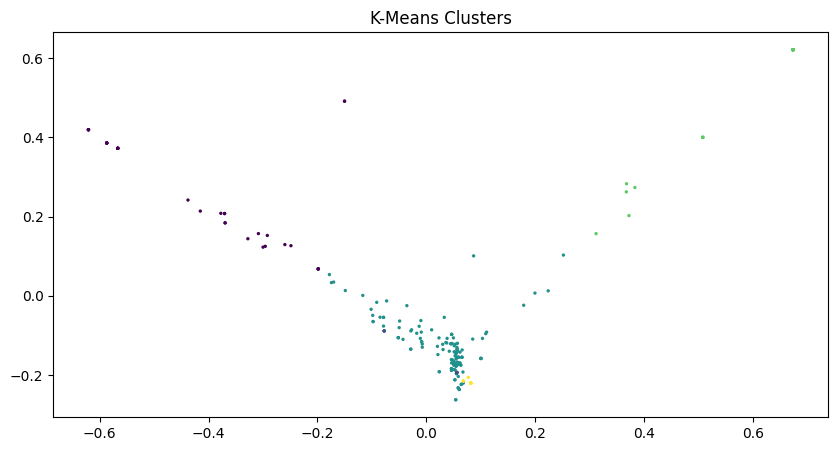

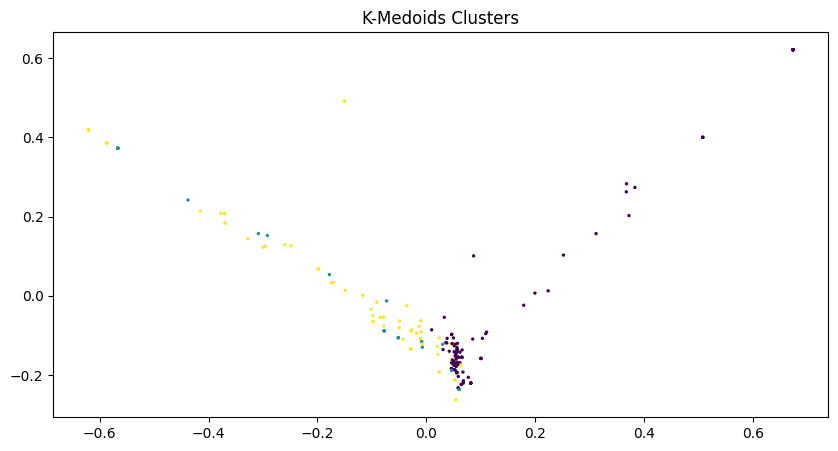

In [ ]:
from sklearn.decomposition import PCA

def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=2)
    plt.title(title)
    plt.show()

X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

plot_clusters(X_pca, labels_kmeans, 'K-Means Clusters')
plot_clusters(X_pca, labels_kmedoids, 'K-Medoids Clusters')

In [ ]:
df.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amazon Standard Identification Number,Style,Review Date,Overall Rating,Review Summary,Review Text,Review Upvotes,Reviewer Name,Verified Purchase,Dryer Review,Sentiment Score,Sentiment Label,processed_text,VADER_Sentiment,Sentiment_Label,clean_text,cluster_kmeans,cluster_kmedoids
0,B00009W3I4,{'Style:': ' Dryer Vent'},2013-08-22,5,Great product,I like this as a vent as well as something tha...,0.0,James. Backus,True,not dryer,0.8720,Positive,"[like, vent, well, something, keep, house, war...",0.8720,Positive,like vent well someth keep hous warmer winter ...,0,10
1,B00009W3PA,{'Size:': ' 6-Foot'},2016-02-08,5,Five Stars,good item,0.0,kevin.,True,not dryer,0.4404,Positive,"[good, item]",0.4404,Positive,good item,2,0
2,B00009W3PA,{'Size:': ' 6-Foot'},2015-08-05,5,Five Stars,Fit my new LG dryer perfectly.,0.0,CDBrannom,True,dryer,0.7717,Positive,"[fit, new, lg, dryer, perfectly]",0.7717,Positive,fit new lg dryer perfect,3,10
3,B00009W3PA,{'Size:': ' 6-Foot'},2015-04-24,5,Perfect size,Good value for electric dryers,0.0,Calvin E Reames,True,dryer,0.6486,Positive,"[good, value, electric, dryers]",0.6486,Positive,good valu electr dryer,2,0
4,B00009W3PA,{'Size:': ' 6-Foot'},2015-03-21,5,Five Stars,Price and delivery was excellent.,0.0,albert j. kong,True,not dryer,0.5719,Positive,"[price, delivery, excellent]",0.5719,Positive,price deliveri excel,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,B004UB1O9Q,{'Style Name:': ' 2 Pack'},2017-06-26,5,Does its Job.,This is the OEM filter. It removes contaminant...,0.0,Colorado Jerry,True,not dryer,0.7178,Positive,"[oem, filter, removes, contaminants, lead, acc...",0.7178,Positive,oem filter remov contamin lead accord literatu...,3,10
2155,B004UB1O9Q,{'Style:': ' 3 Pack'},2017-06-21,5,Awesome,Fit perfectly in my fridge. No leaks and the ...,0.0,J!,True,not dryer,0.8625,Positive,"[fit, perfectly, fridge, leaks, water, tastes,...",0.8625,Positive,fit perfect fridg leak water tast great,3,9
2156,B004UB1O9Q,{'Style:': ' 3 Pack'},2017-06-12,5,It supplies great tasting water and removes ma...,This OEM filter works perfectly as expected. I...,0.0,Colorado Jerry,True,not dryer,0.8519,Positive,"[oem, filter, works, perfectly, expected, supp...",0.8519,Positive,oem filter work perfect expect suppli great ta...,3,2
2157,B004UB1O9Q,{'Style Name:': ' 2 Pack'},2016-02-12,5,The filter I needed,Fits my Samsung fridge. Easy to replace.,0.0,J!,True,not dryer,0.4404,Positive,"[fits, samsung, fridge, easy, replace]",0.4404,Positive,fit samsung fridg easi replac,3,10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Critical Thinking

####**Interpret the topic models generated by LDA. What do you interpret them to mean, and why? What do they say about the data you have selected?**

All of the topics, save for #2 seem to involve dryers (probably since dryer is one of the most frequent word in the data set). Topic 1 seems to be referring to the warranty of the dryer, Topic 2 seems to be referring to the installation process (drilling), Topic 3 seems to be all of the positive reviews of the dryer, Topic 4 seems to be related to the cleaning of the dryer, Topic 5 seems to be a misc. set of words.

Extrapolating from these topics (and removing the focus on dryers specifically), it seems that the data can be segmented into positive and negative reviews of products (inferred from the prevalence of "warranty" and "great"), as well as their installation and maintenance processes.

####**Interpret the outputs of the additional qualitative data analysis method. Compare and contrast its results to LDA, term search, and sentiment analysis.**

I used k-means clustering, an unsupervised learning algorithm, to examine break the Review Text into clusters.  I honestly had a hard time interpretting the results, which may mean that I did not define k correctly (number of clusters) or that the dataset was too small.

Theoretically, k-means clustering differs from LDA in that it does not allow for overlapping clusters. This may be appropriate for analyzing topics that are mutually exclusive.  In this case, it was not.